# Visualizations of P-Nodes
Includes scatter plots.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

from pq_helper import get_dataframe

Load in the data:

In [15]:
data_path = 'data/acm95a100a2018_anonymized_modified.xlsx'
df = pd.read_excel(data_path)
df = df.apply(pd.to_numeric, errors='ignore')

In [16]:
df

,ID,Role,Class,Option,Section,DaysOnline,Views,Contributions,Questions,Notes,Answers,N-Score,Grade,Status,In-Degree,Out-Degree,Seniority
0,P1,Student,U2,ME,5.0,48,60,0,0,0,0,0.531170,B+,0,0,0,U
1,P2,Student,U2,ACM,5.0,150,219,14,0,0,13,0.918357,A+,1,1,5,U
2,P3,Student,U2,ACM,7.0,245,215,9,1,0,4,0.864791,A+,1,4,4,U
3,P4,Student,U3,CS,1.0,107,215,3,0,0,2,0.928847,A+,1,0,3,U
4,P5,Student,U2,ME,3.0,53,216,38,10,0,15,0.944688,A+,1,20,9,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,P192,TA,NaN,NaN,8.0,59,88,1,0,0,0,NaN,NaN,1,0,1,N
192,P193,TA,NaN,NaN,9.0,78,34,0,0,0,0,NaN,NaN,1,0,1,N
193,P194,TA,NaN,NaN,10.0,36,53,3,0,2,1,NaN,NaN,0,0,0,N
194,P195,Head TA,NaN,NaN,NaN,74,237,228,0,7,153,NaN,NaN,1,0,125,N


We first perform some data tidying. We will create a column to group options into fewer categories based on a dictionary which maps each option into its academic division. We will also create a column that groups options into either the top 6 divisions or 'Other'. 

In [19]:
Nstudent = 184
Option = df['Option']

option_dict = {'ACM': 'CMS', 'AM': 'MCE', 'APh': 'APMS', 'Ae':'EAS', 'Aph':'APMS', 'BE':'BBE', 'BMB':'CCE', 'Bi':'BBE', 'CS':'CMS', 'Ch':'CCE', 'ChE': 'CCE', 'ChE (BM)':'CCE', 'ChE (Env)':'CCE', 'ChE (MS)':'CCE', 'ChE (PS)': 'CCE', 'EE':'EE', 'Eng': 'Hum', 'Eng (CNS)': 'Hum', 'Ge': 'GPS', 'ME':'MCE', 'MS':'APMS', 'MedE': 'MedE', 'Ph': 'PMA', 'PlSc':'Hum', 'SE':'EAS', 'AsPh':'PMA'}
top_divisions = ['PMA', 'EE', 'MCE', 'EAS', 'CCE', 'APMS']

new_option_dict = dict()
for k in option_dict:
    if option_dict[k] in top_divisions:
        new_option_dict[k] = option_dict[k]
    else:
        new_option_dict[k] = 'Other'

divisions = np.array([option_dict[i] for i in Option[0:Nstudent]])
new_divisions = np.array([new_option_dict[i] for i in Option[0:Nstudent]])

We'll also create a column for students' grades, omitting $\pm$ grades:

In [23]:
Grade = df['Grade']
Grade_values = [u'A+', u'A', u'A-', u'B+', u'B', u'B-', u'C+', u'C', u'C-', u'D+']

letter_grades = [grade[0] for grade in Grade[0:Nstudent]] 
sorted_grade_values = sorted(set(letter_grades))

We will create a column to indicate each student's seniority (i.e. Undergrad vs Grad):

In [24]:
Class = df['Class']
seniority = [clas[0] for clas in Class[0:Nstudent]]

class_values = sorted(set(Class[0:Nstudent]))

We will also pull out the `N-Score` of each student for later use:

In [28]:
Nscore = df['N-Score']

Now, we construct a dataframe that omits TAs and instructor and includes the columns we constructed above:

In [27]:
df_student = df.iloc[0:Nstudent]
df_student['Division'] = pd.Series(divisions)
df_student['NewDivision'] = pd.Series(new_divisions)
df_student['LetterGrade'] = pd.Series(letter_grades)
df_student['Seniority'] = pd.Series(seniority)

<ipython-input-27-37bf246dd8e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_student['Division'] = pd.Series(divisions)
<ipython-input-27-37bf246dd8e3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_student['NewDivision'] = pd.Series(new_divisions)
<ipython-input-27-37bf246dd8e3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [29]:
df_student

,ID,Role,Class,Option,Section,DaysOnline,Views,Contributions,Questions,Notes,Answers,N-Score,Grade,Status,In-Degree,Out-Degree,Seniority,Division,NewDivision,LetterGrade
0,P1,Student,U2,ME,5.0,48,60,0,0,0,0,0.531170,B+,0,0,0,U,MCE,MCE,B
1,P2,Student,U2,ACM,5.0,150,219,14,0,0,13,0.918357,A+,1,1,5,U,CMS,Other,A
2,P3,Student,U2,ACM,7.0,245,215,9,1,0,4,0.864791,A+,1,4,4,U,CMS,Other,A
3,P4,Student,U3,CS,1.0,107,215,3,0,0,2,0.928847,A+,1,0,3,U,CMS,Other,A
4,P5,Student,U2,ME,3.0,53,216,38,10,0,15,0.944688,A+,1,20,9,U,MCE,MCE,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,P180,Student,U2,ACM,2.0,176,111,5,2,0,3,0.917763,A+,1,2,3,U,CMS,Other,A
180,P181,Student,G1,MedE,10.0,69,156,22,10,0,2,0.913733,A+,1,18,2,G,MedE,Other,A
181,P182,Student,U3,CS,1.0,150,206,0,0,0,0,0.639748,A-,0,0,0,U,CMS,Other,A
182,P183,Student,G1,MedE,7.0,94,113,0,0,0,0,0.778504,A,0,0,0,G,MedE,Other,A


We will now examine some scatter plots based on `DaysOnline` and `Views`, compared across different categories. We begin by comparing across classes and seniority:

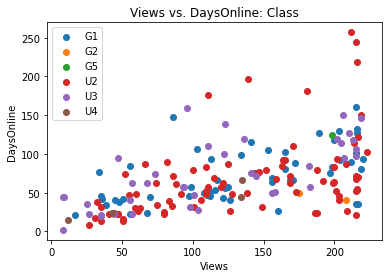

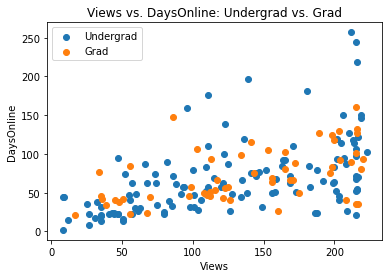

In [32]:
plt.title('Views vs. DaysOnline: Class')
plt.xlabel('Views')
plt.ylabel('DaysOnline')
for i in range(len(class_values)):
    plt.scatter(df_student.loc[df_student['Class'] == class_values[i]]['Views'], df_student.loc[df_student['Class'] == class_values[i]]['DaysOnline'], label= class_values[i])
plt.legend()
plt.show()

plt.title('Views vs. DaysOnline: Undergrad vs. Grad')
plt.xlabel('Views')
plt.ylabel('DaysOnline')
plt.scatter(df_student.loc[df_student['Seniority'] =='U']['Views'], df_student.loc[df_student['Seniority'] == 'U']['DaysOnline'], label= 'Undergrad')
plt.scatter(df_student.loc[df_student['Seniority'] =='G']['Views'], df_student.loc[df_student['Seniority'] == 'G']['DaysOnline'], label= 'Grad')
plt.legend()
plt.show()

In general, there does not appear to be any significant differences across classes or seniority. It appears that those who spent more `DaysOnline` also had the most `Views`, and these were generally `U2` students. However, many students who had high `Views` did not spend many `DaysOnline`. 

We now compare `DaysOnline` vs `Views` by `NScore` and grade:

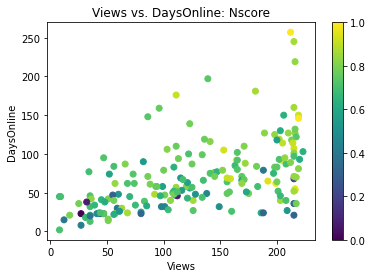

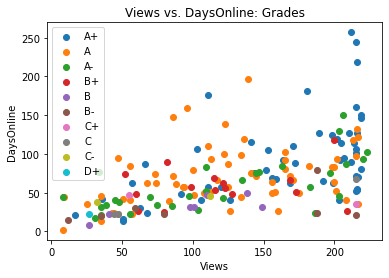

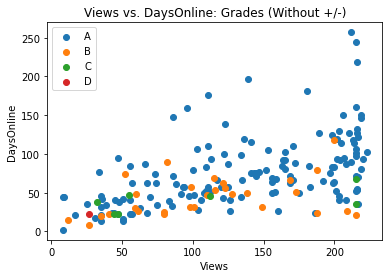

In [36]:
plt.scatter(df_student['Views'], df_student['DaysOnline'], c=Nscore[0:Nstudent]) 
plt.title('Views vs. DaysOnline: Nscore')
plt.colorbar()
plt.xlabel('Views')
plt.ylabel('DaysOnline')
plt.show()

plt.title('Views vs. DaysOnline: Grades')
plt.xlabel('Views')
plt.ylabel('DaysOnline')
for i in range(len(Grade_values)):
    plt.scatter(df_student.loc[df_student['Grade'] == Grade_values[i]]['Views'], df_student.loc[df_student['Grade'] == Grade_values[i]]['DaysOnline'], label=Grade_values[i])
plt.legend()
plt.show()

plt.title('Views vs. DaysOnline: Grades (Without +/-)')
plt.xlabel('Views')
plt.ylabel('DaysOnline')
for i in range(len(sorted_grade_values)):
    plt.scatter(df_student.loc[df_student['LetterGrade'] == sorted_grade_values[i]]['Views'], df_student.loc[df_student['LetterGrade'] == sorted_grade_values[i]]['DaysOnline'], label=sorted_grade_values[i])
plt.legend()
plt.show()

We observe that those with higher `NScore`s (those who scored an A+ grade) tended to have higher `Views` and spent more `DaysOnline`, while those with lower `NScore`s (those who scored Cs or Ds) tended to spend fewer `DaysOnline`, though some did also have high `Views`. This suggests that `DaysOnline` may be more indicative of performance than `Views`. 

Let's examine the same plots across options (divisions):

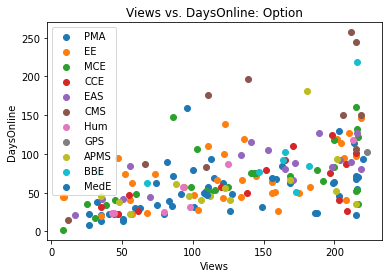

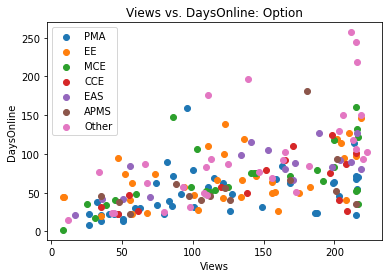

In [37]:
plt.title('Views vs. DaysOnline: Option')
plt.xlabel('Views')
plt.ylabel('DaysOnline')
opt_values = list(set(option_dict.values()))
for i in range(len(opt_values)):
    plt.scatter(df_student.loc[df_student['Division'] == opt_values[i]]['Views'], df_student.loc[df_student['Division'] == opt_values[i]]['DaysOnline'], label=opt_values[i])
    plt.legend()
plt.show()

plt.title('Views vs. DaysOnline: Option')
plt.xlabel('Views')
plt.ylabel('DaysOnline')
new_opt_values = list(set(new_option_dict.values()))
for i in range(len(new_opt_values)):
    plt.scatter(df_student.loc[df_student['NewDivision'] == new_opt_values[i]]['Views'], df_student.loc[df_student['NewDivision'] == new_opt_values[i]]['DaysOnline'], label=new_opt_values[i])
    plt.legend()
plt.show()

We notice that two students in the CMS department appear to have spent more `DaysOnline` compared to other students and also had high `Views`. However, there are no obvious overall trends in `DaysOnline` vs `Views` across different options/divisions. 

Overall, after examining the `DaysOnline` vs `Views` across various categories, there do not appear to be many differences across seniority, classes, divisions, and `NScore`s/grades. In general, having high `DaysOnline` may suggest higher `Views`, but having high `Views` does not imply higher `DaysOnline`. 

### Attributions

Notebook created by Amanda Li. 

Modified from `visualizations_p_nodes_scatter.py` by Siqiao Mu.